In [1]:
import src
from src.paths import MODELS_DIR
import os
import torch
import pandas as pd
from src.bert.classify import BertClassifier
from src.paths import PROCESSED_DATA_DIR
from src.data.process_data import process_open_ended, process_wave_data
from src.data.read_data import load_raw_survey_data, read_stata_file
from src.paths import CODING_DIR, GLES_DIR, PROCESSED_DATA_DIR, ANNOTATED_GENERATIONS_DIR,RAW_DATA_DIR
from src.utils import get_lang

os.environ['HUGGINGFACE_HUB_CACHE'] = '/dss/dssmcmlfs01/pr74ze/pr74ze-dss-0001/ra46lup2/.cache/huggingface/hub'
model_name='fine_tuned_german_bert'
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")



wave_number = 12
wave_df, wave_open_ended_df, df_coding_840s = load_raw_survey_data(wave_number)
wave_open_ended_df = process_open_ended(wave_open_ended_df, df_coding_840s, wave_number)
wave_df_processed = process_wave_data(wave_df, wave_open_ended_df, wave_number)


ModuleNotFoundError: No module named 'src'

In [2]:
import src

ModuleNotFoundError: No module named 'src'

In [1]:
wave10_21_answer_df['labels'][wave10_21_answer_df['labels'].str.contains(',')]

NameError: name 'wave10_21_answer_df' is not defined

In [4]:
gemma8bit_results_df = pd.read_csv(os.path.join(ANNOTATED_GENERATIONS_DIR, 'gemma_w12_load_in_8bit20240414_233057.csv'))
gemma8bit_results_df['lang']= gemma8bit_results_df.output.apply(lambda x: get_lang(x))


In [6]:
gemma_results_df = pd.read_csv(os.path.join(ANNOTATED_GENERATIONS_DIR, 'w12_gemma_results_bertw21.csv'))
#gemma_results_df['lang']= gemma_results_df.output.apply(lambda x: get_lang(x))

llama2_results_df = pd.read_csv(os.path.join(ANNOTATED_GENERATIONS_DIR, 'w12_llama2_results_bertw21.csv'))
#llama2_results_df['lang']= llama2_results_df.output.apply(lambda x: get_lang(x))


In [28]:

mixtral_results_df = pd.read_csv(os.path.join(ANNOTATED_GENERATIONS_DIR, 'mistralai-Mixtral-8x7B-Instruct-v0.1_12_171277217320240414_214510.csv'))
#mixtral_results_df['lang']= mixtral_results_df.output.apply(lambda x: get_lang(x))



In [40]:
mixtral_results_df.query('predicted_class=="keine Angabe"')[['output','predicted_class']].dropna().output.values

array(['Als 64-jähriger, männlicher Westdeutscher mit Hauptschulabschluss und Meisterabschluss, der die CDU/CSU unterstützt, sieht das wichtigste Problem für Deutschland im November 2019 in der Diskussion um die Zukunft der Diesel-Fahrzeuge und die damit einhergehenden politischen und wirtschaftlichen Herausforderungen.',
       'Eines der wichtigsten Probleme, mit denen Deutschland im November 2019 konfrontiert ist, ist der Umgang mit den wirtschaftlichen und sozialen Folgen des Strukturwandels in der Automobilindustrie, insbesondere in Bezug auf Arbeitsplätze und regionale Auswirkungen. (51, männlich, Fachhochschulreife, kaufmännische Lehre, Westdeutschland, keine Parteipräferenz)',
       'Eines der wichtigsten Probleme, mit denen Deutschland im November 2019 konfrontiert ist, ist der fortschreitende Klimawandel und der Druck, Maßnahmen zur Senkung von Treibhausgasemissionen zu ergreifen, die mit den grünen Politiken in Einklang stehen, die der Befragte unterstützt. (Anmerkung: Da d

In [12]:

results_df = pd.merge(llama2_results_df, gemma_results_df, on='user_id', suffixes=('_llama2', '_gemma'))
results_df = pd.merge(results_df, mixtral_results_df, on='user_id',suffixes=('', '_mixtral'))
mixtral_results_df2 =mixtral_results_df.add_suffix('_mixtral')
mixtral_results_df2 == mixtral_results_df2[mixtral_results_df2['output_mixtral'] != '']
mixtral_results_df2= mixtral_results_df2.rename(columns={'user_id_mixtral':'user_id'})
#APPEND mixtral to colnames except user_id

results_df2 = pd.merge(results_df, mixtral_results_df2, on='user_id',suffixes=('', '_mixtral'))

In [15]:
results_df2.filter(like='lang').apply(lambda x: x.value_counts(1)*100)

,lang_llama2,lang_gemma,lang,lang_mixtral
,NaN,NaN,6.594696,6.594696
af,NaN,NaN,0.398967,0.398967
de,98.732692,99.906125,92.924196,92.924196
en,1.267308,0.093875,0.070406,0.070406
nl,NaN,NaN,0.011734,0.011734


In [111]:
from src.bert.classify import BertClassifier

model_name='fine_tuned_german_bert'
classifier = BertClassifier(model_name=model_name, device='cuda')


NameError: name 'np' is not defined

In [131]:
text="Eines der wichtigsten Probleme, mit dem Deutschland im November 2019 konfrontiert ist, ist die anhaltende Diskussion um die Klimapolitik und die damit verbundenen Herausforderungen bei der Umsetzung effektiver Maßnahmen zur Begrenzung des CO2-Ausstoßes."
classifier.process_llm_output(file_path=None,text=text,predict=True)['predicted_class']

'Klimapolitik'

In [95]:
!cat /dss/dsshome1/0F/ra46lup2/ma-yoztyurk/results/mistralai-Mixtral-8x7B-Instruct-v0.1_12_1712772173/18629.json 

{
    "survey_wave": 6838,
    "user_id": 18629,
    "model": "mistralai/Mixtral-8x7B-Instruct-v0.1",
    "runtime": 8.266746997833252,
    "prompt": "<s>[INST] Identifizieren Sie das wichtigste Problem, mit dem Deutschland im November 2019 konfrontiert ist. Geben Sie die Antwort in einem prägnanten Satz an, konzentrieren Sie sich nur auf ein einziges Thema ohne weitere Ausführungen oder Auflistung zusätzlicher Probleme. Wiederholen Sie nicht die Informationen die Ihnen gegeben wurden, und geben Sie Ihre Antwort direkt und ohne einleitende Phrasen. Antworten Sie auf Deutsch und ausschließlich auf Deutsch, verwenden Sie keine Englische Sprache. Antworten Sie aus der Sicht eines Befragten mit deutscher Staatsbürgerschaft und den im nachfolgenden spezifizierten Eigenschaften. Der Befragte ist 52 Jahre alt und männlich. Er hat einen Realschulabschluss und hat eine Lehre abgeschlossen. Er lebt in Westdeutschland und unterstützt hauptsächlich die SPD. [/INST]\n",
    "input_num_token": 240,


In [89]:
!cat /dss/dssmcmlfs01/pr74ze/pr74ze-dss-0001/ra46lup2/ma-yoztyurk/results/mistralai-Mixtral-8x7B-Instruct-v0.1_12_1712772173/284.json

cat: /dss/dssmcmlfs01/pr74ze/pr74ze-dss-0001/ra46lup2/ma-yoztyurk/results/mistralai-Mixtral-8x7B-Instruct-v0.1_12_1712772173/284.json: No such file or directory


In [167]:
combined_df['ftp_mixtral'] = combined_df.probabilities_mixtral.apply(lambda x: float(x[2:9]))*100
combined_df['ftp_llama2'] = combined_df.probabilities_llama2.apply(lambda x: float(x[2:9]))*100
combined_df['ftp_gemma'] = combined_df.probabilities_gemma.apply(lambda x: float(x[2:9]))*100

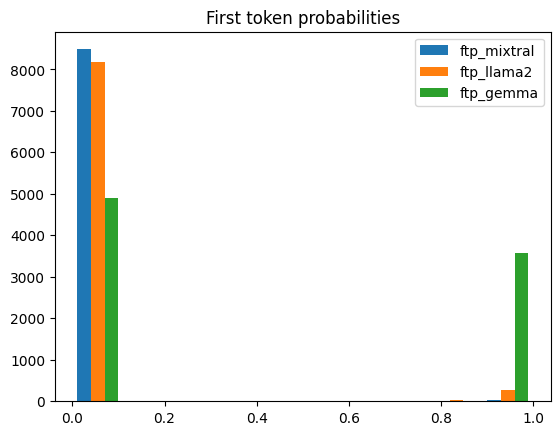

In [173]:
import numpy as np
import matplotlib.pyplot as plt

bins = np.linspace(0, 1, 10)

plt.hist([combined_df['ftp_mixtral'],combined_df['ftp_llama2'], combined_df['ftp_gemma']], bins, label=['ftp_mixtral', 'ftp_llama2','ftp_gemma'])
plt.legend(loc='upper right')
plt.title('First token probabilities')
plt.show()

In [52]:
combined_df =pd.merge(wave_open_ended_df,results_df2,left_on='lfdn',right_on='user_id')

In [208]:
wave_df_processed.filter(regex='user_id|predicted_class|kpx_840')

,kpx_840_text,kpx_840_cid,kpx_840_class1_name
0,Klimawandel,46.0,Klimapolitik
1,Klimawandel,46.0,Klimapolitik
2,Bildungspolitik,42.0,Bildungspolitik
3,Bezahlbarer Wohnraum,53.0,Wohnungspolitik
4,Klima,46.0,Klimapolitik
...,...,...,...
9789,Flüchtlingshilfe,36.0,Migration und Integration
9790,Ausländer,36.0,Migration und Integration
9791,Soziale Gerechtigkeit,30.0,Soziale Gerechtigkeit
9792,Sicherheit,16.0,Innere Sicherheit


In [207]:

wave_df_processed[wave_df_processed.kpx_840_class1_name.isna()]

,study,version,doi,field_start,field_end,sample,n_participation,p_participation,access_panel,ostwest,...,code_2330,2330_gesis_class,berufabschluss_clause,2330_sampling_id,2330_sampling_class,leaning_party,gender,age,age_group,schulabschluss_clause
20,6838,6-0-0 (2023-05-04),doi:10.4232/1.14114,2019-11-05,2019-11-19,3,12,1-1-1-1-1-1-1-1-1-1-1-1,0,Westdeutschland,...,4.0,Abgeschlossene kaufmännische Lehre,hat eine kaufmännische Lehre abgeschlossen.,5.0,some sort of Lehre,keine Partei,männlich,59,45-59 Years,hat einen Fachhochschulreife
27,6838,6-0-0 (2023-05-04),doi:10.4232/1.14114,2019-11-05,2019-11-19,3,11,1-1-1-1-1-1-1-1-1-0-1-1,0,Westdeutschland,...,10.0,Hochschulabschluss,hat einen Universitätsabschluss.,1.0,uni,Die Linke,weiblich,33,30-44 Years,hat das Abitur
60,6838,6-0-0 (2023-05-04),doi:10.4232/1.14114,2019-11-05,2019-11-19,4,8,0-0-0-0-a1-1-1-1-1-1-0-1-1,0,Westdeutschland,...,4.0,Abgeschlossene kaufmännische Lehre,hat eine kaufmännische Lehre abgeschlossen.,5.0,some sort of Lehre,keine Partei,weiblich,58,45-59 Years,hat einen Realschulabschluss
67,6838,6-0-0 (2023-05-04),doi:10.4232/1.14114,2019-11-05,2019-11-19,4,9,0-0-0-0-a1-1-1-1-1-1-1-1-1,0,Westdeutschland,...,13.0,Noch in Ausbildung/Studium,befindet sich noch in beruflicher Ausbildung.,6.0,other,die SPD,weiblich,20,18-29 Years,hat einen Realschulabschluss
94,6838,6-0-0 (2023-05-04),doi:10.4232/1.14114,2019-11-05,2019-11-19,3,10,1-1-0-1-0-1-1-1-1-1-1-1,0,Westdeutschland,...,3.0,Abgeschlossene gewerbliche oder landwirtschaft...,hat eine gewerbliche oder landwirtschaftliche ...,5.0,some sort of Lehre,keine Partei,männlich,43,30-44 Years,hat keinen Schulabschluss
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9637,6838,6-0-0 (2023-05-04),doi:10.4232/1.14114,2019-11-05,2019-11-19,3,12,1-1-1-1-1-1-1-1-1-1-1-1,0,Westdeutschland,...,4.0,Abgeschlossene kaufmännische Lehre,hat eine kaufmännische Lehre abgeschlossen.,5.0,some sort of Lehre,keine Partei,weiblich,52,45-59 Years,hat einen Realschulabschluss
9671,6838,6-0-0 (2023-05-04),doi:10.4232/1.14114,2019-11-05,2019-11-19,3,12,1-1-1-1-1-1-1-1-1-1-1-1,0,Westdeutschland,...,12.0,Andere berufliche Ausbildungszertifikat,hat eine Lehre abgeschlossen.,5.0,some sort of Lehre,keine Partei,weiblich,60,45-59 Years,hat das Abitur
9688,6838,6-0-0 (2023-05-04),doi:10.4232/1.14114,2019-11-05,2019-11-19,3,12,1-1-1-1-1-1-1-1-1-1-1-1,0,Westdeutschland,...,9.0,Fachhochschulabschluss,hat einen Fachhochschulabschluss.,2.0,applied sciences,die Grünen,weiblich,64,60 Years and Older,hat einen Fachhochschulreife
9728,6838,6-0-0 (2023-05-04),doi:10.4232/1.14114,2019-11-05,2019-11-19,3,9,1-1-1-1-0-1-1-1-0-0-1-1,0,Westdeutschland,...,10.0,Hochschulabschluss,hat einen Universitätsabschluss.,1.0,uni,keine Partei,männlich,58,45-59 Years,hat das Abitur


In [199]:
aa=pd.merge(combined_df.filter(regex='user_id|predicted_class|kpx_840_class1_name'),wave_df_processed.filter(regex='lfdn$|gender|^age$|clause'),how='inner', left_on='user_id',right_on='lfdn')

In [204]:
aa[aa.predicted_class_llama2=='Politische Strukturen und Prozesse'] 

,kpx_840_class1_name,user_id,predicted_class_llama2,predicted_class_gemma,predicted_class_mixtral,lfdn,berufabschluss_clause,gender,age,schulabschluss_clause
17,NaN,10896,"Werte, politische Kultur und Gesellschaftskritik",Corona-Pandemie,Klimapolitik,10896,hat eine kaufmännische Lehre abgeschlossen.,männlich,59,hat einen Fachhochschulreife
23,NaN,2793,Armut,Migration und Integration,Soziale Gerechtigkeit,2793,hat einen Universitätsabschluss.,weiblich,33,hat das Abitur
55,NaN,18638,Politische Strukturen und Prozesse,Corona-Pandemie,"Werte, politische Kultur und Gesellschaftskritik",18638,hat eine kaufmännische Lehre abgeschlossen.,weiblich,58,hat einen Realschulabschluss
62,NaN,18658,Armut,Corona-Pandemie,Politische Strukturen und Prozesse,18658,befindet sich noch in beruflicher Ausbildung.,weiblich,20,hat einen Realschulabschluss
87,NaN,16827,Arbeitslosigkeit und Grundsicherung,Corona-Pandemie,keine Angabe,16827,hat eine gewerbliche oder landwirtschaftliche ...,männlich,43,hat keinen Schulabschluss
...,...,...,...,...,...,...,...,...,...,...
8326,NaN,13846,Soziale Gerechtigkeit,Migration und Integration,Soziale Gerechtigkeit,13846,hat einen Fachhochschulabschluss.,weiblich,48,hat einen Fachhochschulreife
8393,NaN,22132,Wirtschaftspolitik,"Werte, politische Kultur und Gesellschaftskritik",Migration und Integration,22132,hat einen Universitätsabschluss.,weiblich,29,hat das Abitur
8405,NaN,22156,Wirtschaftspolitik,Außenpolitik,Klimapolitik,22156,hat eine kaufmännische Lehre abgeschlossen.,weiblich,31,hat einen Realschulabschluss
8430,NaN,22194,Armut,Corona-Pandemie,Migration und Integration,22194,hat keine berufliche Ausbildung abgeschlossen.,weiblich,40,hat einen Hauptschulabschluss


In [200]:
aa.to_csv('cross_tab.csv')

In [63]:
llama2_proportion= combined_df.predicted_class_llama2.value_counts(1).reset_index().rename(columns={'predicted_class_llama2':'llama2_proportion','index':'class'})
mixtral_proportion= combined_df.predicted_class_mixtral.value_counts(1).reset_index().rename(columns={'predicted_class_mixtral':'mixtral_proportion','index':'class'})

gemma_proportion= combined_df.predicted_class_gemma.value_counts(1).reset_index().rename(columns={'predicted_class_gemma':'gemma_proportion','index':'class'})
survey_proportion= combined_df.kpx_840_class1_name.value_counts(1).reset_index().rename(columns={'index':'class',"kpx_840_class1_name":"survey_proportion"})
#merged_df = pd.merge(llama2_proportion,survey_proportion,on='kpx_840_class1_name',how='outer').fillna(0)  # Fill NaN with 0
#merged_df = pd.merge(merged_df,gemma_proportion,on='kpx_840_class1_name',how='outer').fillna(0)  # Fill NaN with 0

In [64]:
merged_df = pd.merge(llama2_proportion,survey_proportion,on='class',how='outer').fillna(0)  # Fill NaN with 0
merged_df = pd.merge(merged_df,gemma_proportion,on='class',how='outer').fillna(0)  # Fill NaN with 0
merged_df = pd.merge(merged_df,mixtral_proportion,on='class',how='outer').fillna(0)  # Fill NaN with 0
merged_df

,class,llama2_proportion,survey_proportion,gemma_proportion,mixtral_proportion
0,Wirtschaftspolitik,0.195494,0.028057,0.011969,0.076156
1,Politische Strukturen und Prozesse,0.123445,0.021850,0.005163,0.054565
2,Klimapolitik,0.112767,0.097207,0.005515,0.241727
3,Migration und Integration,0.107017,0.243451,0.387233,0.173668
4,"Werte, politische Kultur und Gesellschaftskritik",0.075334,0.031161,0.091997,0.038958
5,Soziale Gerechtigkeit,0.073926,0.077716,0.004224,0.102441
6,Arbeitslosigkeit und Grundsicherung,0.062075,0.009932,0.000235,0.002582
7,Armut,0.058906,0.083054,0.000352,0.002464
8,Energiepolitik,0.046233,0.009932,0.000939,0.060784
9,Corona-Pandemie,0.037667,0.000124,0.424196,0.004224


In [ ]:
#print some results from results_df.output_llama2 (5-10)
results_df[['user_id', 'output_llama2', 'output_gemma']].head(10).output_llama2.values.tolist()

In [ ]:
!gzip -r /dss/dsshome1/0F/ra46lup2/ma-yoztyurk/data.zip /dss/dsshome1/0F/ra46lup2/ma-yoztyurk/data

In [65]:
import plotly.graph_objects as go


def plot_comparison_chart(data, title, output_file_path,save=False):
    # Create traces for Actual and Synthetic data
    trace1 = go.Bar(
        x=data['class'], 
        y=data['survey_proportion'], 
        name='survey_proportion',
        marker=dict(color='RoyalBlue')
    )
    trace2 = go.Bar(
        x=data['class'], 
        y=data['llama2_proportion'], 
        name='llama2_proportion',
        marker=dict(color='Crimson')
    )
    trace3 = go.Bar(
        x=data['class'], 
        y=data['gemma_proportion'], 
        name='gemma_proportion',
        marker=dict(color='Green')
    )
    trace4 = go.Bar(
        x=data['class'], 
        y=data['mixtral_proportion'], 
        name='mixtral_proportion',
        marker=dict(color='Gray')
    )
    # Combine the traces in a single figure
    fig = go.Figure(data=[trace1, trace2,trace3,trace4])

    # Update layout for a clearer view
    fig.update_layout(
        title=title,
        xaxis_tickangle=-45,  # Rotate labels to prevent overlap
        xaxis_title='Category',
        yaxis_title='Percentage (log scale)',
        barmode='group',  # Group bars for side-by-side comparison
        legend_title_text='Type',
        font=dict(
        size=20,  # Increase font size to 16
    )
    )
    if save and output_file_path.endswith(".html"):    
        # Save the figure as an HTML file
        fig.write_html(output_file_path)
    elif save and output_file_path.endswith(".png"):
        fig.write_image(output_file_path + ".png")
    #fig.show()

In [67]:
#import kaleido
import plotly.graph_objects as go
title=f"Wave 12 - 11/2019 - Actual vs Synthetic Answers from Llama-2-13b-chat-hf and gemma-7b, mixtral sample_size={combined_df.shape[0]}"
plot_comparison_chart(merged_df,title , 'comparison_chart_3.html',save=True)

In [ ]:
%load_ext autoreload
%autoreload 2

In [61]:
merged_df

,class,llama2_proportion,survey_proportion,gemma_proportion,predicted_class_mixtral
0,Wirtschaftspolitik,0.195494,0.028057,0.011969,0.076156
1,Politische Strukturen und Prozesse,0.123445,0.021850,0.005163,0.054565
2,Klimapolitik,0.112767,0.097207,0.005515,0.241727
3,Migration und Integration,0.107017,0.243451,0.387233,0.173668
4,"Werte, politische Kultur und Gesellschaftskritik",0.075334,0.031161,0.091997,0.038958
5,Soziale Gerechtigkeit,0.073926,0.077716,0.004224,0.102441
6,Arbeitslosigkeit und Grundsicherung,0.062075,0.009932,0.000235,0.002582
7,Armut,0.058906,0.083054,0.000352,0.002464
8,Energiepolitik,0.046233,0.009932,0.000939,0.060784
9,Corona-Pandemie,0.037667,0.000124,0.424196,0.004224
